In [ ]:
###PART 1

In [ ]:
#1

In [3]:
dna1 = "CCAGGGGAGGTTCCTGAACAACACGGAGCTGCAGGCGGCGAACGGGAGGTTCCAGAGGGCGACGGC"
dna2 = "GCGGCGGGGAGGTTCCCGAGCGGGAGCGACCTGGAGAGCGTGCAGGGGAACATACAGAGGAGCGC"

In [4]:
print("DNA 1:", dna1)
print("DNA 2:", dna2)

DNA 1: CCAGGGGAGGTTCCTGAACAACACGGAGCTGCAGGCGGCGAACGGGAGGTTCCAGAGGGCGACGGC
DNA 2: GCGGCGGGGAGGTTCCCGAGCGGGAGCGACCTGGAGAGCGTGCAGGGGAACATACAGAGGAGCGC


In [ ]:
#2

In [5]:
dna1_length = len(dna1)
dna2_length = len(dna2)

In [6]:
print("Length Of DNA 1:", dna1_length)
print("Length Of DNA 2:", dna2_length)

Length Of DNA 1: 66
Length Of DNA 2: 65


In [ ]:
#3

In [15]:
print(dna1[0:10])
print(dna2[0:10])
print(dna1[56:66])
print(dna1[55:65])
print(dna1[63:66]==dna2[62:65])
print(dna1[61:66]+dna2[60:65])
print(dna1.count("A"))
print(dna2.count("A"))

CCAGGGGAGG
GCGGCGGGGA
GGGCGACGGC
AGGGCGACGG
False
ACGGCAGCGC
15
14


In [ ]:
#4

In [16]:
DNA_motifs = ['TTCAT','AATCATGA','CCCG','GGCATT','CACGT']
print("DNA_motifs: ", DNA_motifs)

DNA_motifs:  ['TTCAT', 'AATCATGA', 'CCCG', 'GGCATT', 'CACGT']


In [23]:
print(DNA_motifs[3])
print(DNA_motifs[0], DNA_motifs[1])
print(DNA_motifs[3], DNA_motifs[4])

GGCATT
TTCAT AATCATGA
GGCATT CACGT


In [ ]:
#5

In [24]:
DNA_motifs_length = {'TTCAT':5,'AATCATGA':8,'CCCG':4,'GGCATT':6,'CACGT':5}
print("DNA_motifs_length : ", DNA_motifs_length)

DNA_motifs_length :  {'TTCAT': 5, 'AATCATGA': 8, 'CCCG': 4, 'GGCATT': 6, 'CACGT': 5}


In [37]:
DNA_motifs_length["CCAT"] = len("CCAT")
print(DNA_motifs_length)
print(DNA_motifs_length.keys())
print(DNA_motifs_length.values())
print(DNA_motifs_length)
if "CCT" in DNA_motifs_length:
  print("Key Exists")
else:
  print("No Key Found")


{'TTCAT': 5, 'AATCATGA': 8, 'CCCG': 4, 'GGCATT': 6, 'CACGT': 5, 'CCAT': 4}
dict_keys(['TTCAT', 'AATCATGA', 'CCCG', 'GGCATT', 'CACGT', 'CCAT'])
dict_values([5, 8, 4, 6, 5, 4])
{'TTCAT': 5, 'AATCATGA': 8, 'CCCG': 4, 'GGCATT': 6, 'CACGT': 5, 'CCAT': 4}
No Key Found


In [ ]:
#6

In [38]:
DNA_motifs=['TTCAT','AATCATGA','CCCG','GGCATT','CACGT']
print("DNA_motifs:",DNA_motifs)


DNA_motifs: ['TTCAT', 'AATCATGA', 'CCCG', 'GGCATT', 'CACGT']


In [44]:
for i in DNA_motifs:
  print("Length of", i, len(i))
  if len(i) > 5:
    print("Length of" , i, "greater than 5")

Length of TTCAT 5
Length of AATCATGA 8
Length of AATCATGA greater than 5
Length of CCCG 4
Length of GGCATT 6
Length of GGCATT greater than 5
Length of CACGT 5


In [ ]:
#7

In [61]:
samplelist = [1,2,3,5]

In [62]:
def findmax(list):
  max = 0
  for i in list:
    if i > max:
      max = i
    else:
      max = max
  print(max)

def findmin(list):
  min = 100000000
  for i in list:
    if i < min:
      min = i
    else:
      min = min
  print(min)

def findsum(list):
  sum = 0
  for i in list:
    sum = sum + i
  print(sum)

In [63]:
findmax(samplelist)
findmin(samplelist)
findsum(samplelist)

5
1
11


In [ ]:
###PART 2

In [ ]:
#8

In [68]:
################################################################################################
# Needleman-Wunsch Global Pairwise Alignment algorithm
################################################################################################

def buildTable(X, Y, match=1, mismatch=-1, gap=-1):
    print("Sequence 1:", X)
    print("Sequence 2:", Y)
    # create table of zeros with dimension (1+|X|)-by-(1+|Y|)
    # X: vertical,  Y:horizontal
    opt = []
    for i in range(1+len(X)):
      row = []
      for j in range(1+len(Y)):
        row.append(0)
      opt.append(row)
    
    # print out the initial table
    #print("The intial alignment table is:")
    #for row in opt:
    #      print(' '.join('%3d' % val for val in row))

    for j in range(1,1+len(X)):
        opt[j][0] = opt[j-1][0] + gap       # initialize left column
    for k in range(1,1+len(Y)):
        opt[0][k] = opt[0][k-1] + gap       # initialize top row
    
    # calculate the score for each possible alignment
    for j in range(1,1+len(X)):
        for k in range(1, 1+len(Y)):
          if X[j-1] == Y[k-1]:  # sequence start with 0
            option1 = opt[j-1][k-1] + match  # align chars, match
          else:
            option1 = opt[j-1][k-1] + mismatch  # align chars, mismatch
          option2 = opt[j-1][k] + gap                     # last of X with gap
          option3 = opt[j][k-1] + gap                     # last of Y with gap
          opt[j][k] = max(option1, option2, option3)
    
    return opt


def TraceBack(X, Y, table, match=1, mismatch=-1, gap=-1):
    first = ''        # alignment for X
    second = ''       # alignment for Y
    glue = ''         # line showing matches/mismatches

    # start reconstruction at bottom-right of table
    j = len(X)
    k = len(Y)
    
    while j>0 or k>0:
        if j>0 and k>0 and ((X[j-1] == Y[k-1] and table[j][k] == table[j-1][k-1] + match) or (X[j-1] != Y[k-1] and table[j][k] == table[j-1][k-1] + mismatch)):
            # option1 above; match X[j-1] with Y[k-1]
            first =  X[j-1] + first
            second = Y[k-1] + second
            if X[j-1] == Y[k-1] and table[j][k] == table[j-1][k-1] + match:
              glue = '|' + glue   # designate match
            elif X[j-1] != Y[k-1] and table[j][k] == table[j-1][k-1] + mismatch:
              glue = '.' + glue   # designate mismatch
            j = j-1
            k = k-1
        elif j > 0 and table[j][k] == table[j-1][k] + gap:
            # option1 above; match X[j-1] with a gap in Y
            first  = X[j-1] + first
            second = '-' + second
            glue   = ' ' + glue
            j = j-1
        elif k > 0 and table[j][k] == table[j][k-1] + gap:
            # option2 above; match gap in X with Y[k-1]
            first  = '-'  + first
            second = Y[k-1] + second
            glue   = ' '  + glue
            k = k-1
    print("The best alignment is:")
    print(first)
    print(glue)
    print(second)
    print("The score of optimal alignment is: ",table[len(X)][len(Y)])
    return first,glue,second

In [75]:
buildTable(dna1, dna2, match=1, mismatch=-1, gap=-1)

Sequence 1: CCAGGGGAGGTTCCTGAACAACACGGAGCTGCAGGCGGCGAACGGGAGGTTCCAGAGGGCGACGGC
Sequence 2: GCGGCGGGGAGGTTCCCGAGCGGGAGCGACCTGGAGAGCGTGCAGGGGAACATACAGAGGAGCGC


[[0,
  -1,
  -2,
  -3,
  -4,
  -5,
  -6,
  -7,
  -8,
  -9,
  -10,
  -11,
  -12,
  -13,
  -14,
  -15,
  -16,
  -17,
  -18,
  -19,
  -20,
  -21,
  -22,
  -23,
  -24,
  -25,
  -26,
  -27,
  -28,
  -29,
  -30,
  -31,
  -32,
  -33,
  -34,
  -35,
  -36,
  -37,
  -38,
  -39,
  -40,
  -41,
  -42,
  -43,
  -44,
  -45,
  -46,
  -47,
  -48,
  -49,
  -50,
  -51,
  -52,
  -53,
  -54,
  -55,
  -56,
  -57,
  -58,
  -59,
  -60,
  -61,
  -62,
  -63,
  -64,
  -65],
 [-1,
  -1,
  0,
  -1,
  -2,
  -3,
  -4,
  -5,
  -6,
  -7,
  -8,
  -9,
  -10,
  -11,
  -12,
  -13,
  -14,
  -15,
  -16,
  -17,
  -18,
  -19,
  -20,
  -21,
  -22,
  -23,
  -24,
  -25,
  -26,
  -27,
  -28,
  -29,
  -30,
  -31,
  -32,
  -33,
  -34,
  -35,
  -36,
  -37,
  -38,
  -39,
  -40,
  -41,
  -42,
  -43,
  -44,
  -45,
  -46,
  -47,
  -48,
  -49,
  -50,
  -51,
  -52,
  -53,
  -54,
  -55,
  -56,
  -57,
  -58,
  -59,
  -60,
  -61,
  -62,
  -63],
 [-2,
  -2,
  0,
  -1,
  -2,
  -1,
  -2,
  -3,
  -4,
  -5,
  -6,
  -7,
  -8,
  -9,
  -10,
  -11,
 

In [77]:
table = buildTable(dna1, dna2, match=1, mismatch=-1, gap=-1)
TraceBack(dna1, dna2, table, match=1, mismatch=-1, gap=-1)

Sequence 1: CCAGGGGAGGTTCCTGAACAACACGGAGCTGCAGGCGGCGAACGGGAGGTTCCAGAGGGCGACGGC
Sequence 2: GCGGCGGGGAGGTTCCCGAGCGGGAGCGACCTGGAGAGCGTGCAGGGGAACATACAGAGGAGCGC
The best alignment is:
-C--CAGGGGAGGTTCCTGAACAACA-CGGAGCTGCAG-GCG-GCGAACGGGAGGTTCCAGAGGGCGACGGC
 |  | |||||||||||.||.|...| | ||.|||.|| ||| ||  |.||||...|.|||| ||.| | ||
GCGGC-GGGGAGGTTCCCGAGCGGGAGC-GACCTGGAGAGCGTGC--AGGGGAACATACAGA-GGAG-C-GC
The score of optimal alignment is:  20


('-C--CAGGGGAGGTTCCTGAACAACA-CGGAGCTGCAG-GCG-GCGAACGGGAGGTTCCAGAGGGCGACGGC',
 ' |  | |||||||||||.||.|...| | ||.|||.|| ||| ||  |.||||...|.|||| ||.| | ||',
 'GCGGC-GGGGAGGTTCCCGAGCGGGAGC-GACCTGGAGAGCGTGC--AGGGGAACATACAGA-GGAG-C-GC')

In [ ]:
###PART 3

In [ ]:
# 9

In [80]:
####################################################################################### 
# a dictionary to translate three-letter mRNA to three-letter amino acid here 
#######################################################################################

translate = { 
  'UUU':'Phe','UCU':'Ser','UAU':'Tyr','UGU':'Cys',
  'UUC':'Phe','UCC':'Ser','UAC':'Tyr','UGC':'Cys',
  'UUA':'Leu','UCA':'Ser','UAA':'Stop','UGA':'Stop',
  'UUG':'Leu','UCG':'Ser','UAG':'Stop','UGG':'Trp',
  'CUU':'Leu','CCU':'Pro','CAU':'His','CGU':'Arg',
  'CUC':'Leu','CCC':'Pro','CAC':'His','CGC':'Arg',
  'CUA':'Leu','CCA':'Pro','CAA':'Gln','CGA':'Arg',
  'CUG':'Leu','CCG':'Pro','CAG':'Gln','CGG':'Arg',
  'AUU':'Ile','ACU':'Thr','AAU':'Asn','AGU':'Ser',
  'AUC':'Ile','ACC':'Thr','AAC':'Asn','AGC':'Ser',
  'AUA':'Ile','ACA':'Thr','AAA':'Lys','AGA':'Arg',
  'AUG':'Met','ACG':'Thr','AAG':'Lys','AGG':'Arg',
  'GUU':'Val','GCU':'Ala','GAU':'Asp','GGU':'Gly',
  'GUC':'Val','GCC':'Ala','GAC':'Asp','GGC':'Gly',
  'GUA':'Val','GCA':'Ala','GAA':'Glu','GGA':'Gly',
  'GUG':'Val','GCG':'Ala','GAG':'Glu','GGG':'Gly'
}

#######################################################################################
# a dictionary to map three-letter amino acid to one-letter amino acid here
#######################################################################################

AA_mapping = {
    'Ala':'A', 'Arg':'R','Asn':'N',
    'Asp':'D', 'Cys':'C','Gln':'Q',
    'Glu':'E', 'Gly':'G','His':'H',
    'Ile':'I', 'Leu':'L','Lys':'K',
    'Met':'M', 'Phe':'F','Pro':'P',
    'Ser':'S', 'Thr':'T','Trp':'W',
    'Tyr':'Y','Val':'V'
}

#######################################################################################
# This is the function to get protein sequence from DNA sequence
# The input is any DNA sequence.
# The return type should be the protein sequence translated from DNA sequence.
#######################################################################################

def get_protein_from_DNA(DNA):
  protein = ''
  RNA_seq = DNA.replace('T', 'U')

  ### Define location of start codon (AUG)
  start_codon = RNA_seq.find('AUG')
  mRNA = []
  for i in range(start_codon, len(RNA_seq), 3): 
    codon = RNA_seq[i:i + 3]
    if len(codon)==3:
        mRNA.append(codon)
  for codon in mRNA:
    if codon == 'UAA' or  codon == 'UAG' or  codon == 'UGA':
      break
    protein = protein + AA_mapping[translate[codon]]
  return (protein)

In [82]:
dna1_proteins = get_protein_from_DNA(dna1)
dna2_proteins = get_protein_from_DNA(dna2)

In [83]:
print("Protein sequence of DNA 1 is:", dna1_proteins)
print("Protein sequence of DNA 2 is:", dna2_proteins)

Protein sequence of DNA 1 is: RGGS
Protein sequence of DNA 2 is: GGEVPERERPGERAGEHTEER


In [ ]:
### PART 4

In [ ]:
# 10

In [ ]:
('A', ('B',(),()),('C',('D', ('E',(),())('F', (),())),('G',(),())))

In [ ]:
### PART 5

In [ ]:
#11

In [84]:
rna_seq = 'GGGCAAUCCUCUUCGGGCCC'
rna_ss =  '((((...((.....))))))'

In [85]:
# Running VARNA (Linear layout/PNG output)
def run_varna_linear(rna_sequence, rna_dot_bracket, output_file = 'rna_linear_plot.png'):
  import subprocess
  !rm VARNAv3-93.jar
  !wget http://varna.lri.fr/bin/VARNAv3-93.jar
  subprocess.Popen(["java", "-cp","./VARNAv3-93.jar", "fr.orsay.lri.varna.applications.VARNAcmd", '-sequenceDBN', rna_sequence, '-structureDBN', rna_dot_bracket, '-o', output_file, '-algorithm', 'line', '-resolution', '8.0', '-bpStyle', 'lw'], stderr=subprocess.STDOUT, stdout=subprocess.PIPE).communicate()[0]

In [86]:
# Visualize the figure 
def visualize_figure(figure_file, fig_size = (1000,600)):
  # Display in jupyter notebook
  from PIL import Image
  im = Image.open(figure_file)
  im1 = im.resize(fig_size) 
  # Shows the image in image viewer  
  im1
  return im1

In [97]:
run_varna_linear(rna_seq, rna_ss)

--2020-12-05 01:17:29--  http://varna.lri.fr/bin/VARNAv3-93.jar
Resolving varna.lri.fr (varna.lri.fr)... 129.175.15.21
Connecting to varna.lri.fr (varna.lri.fr)|129.175.15.21|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 695802 (679K) [application/java-archive]
Saving to: ‘VARNAv3-93.jar’

VARNAv3-93.jar      100%[===================>] 679.49K   989KB/s    in 0.7s    

2020-12-05 01:17:31 (989 KB/s) - ‘VARNAv3-93.jar’ saved [695802/695802]



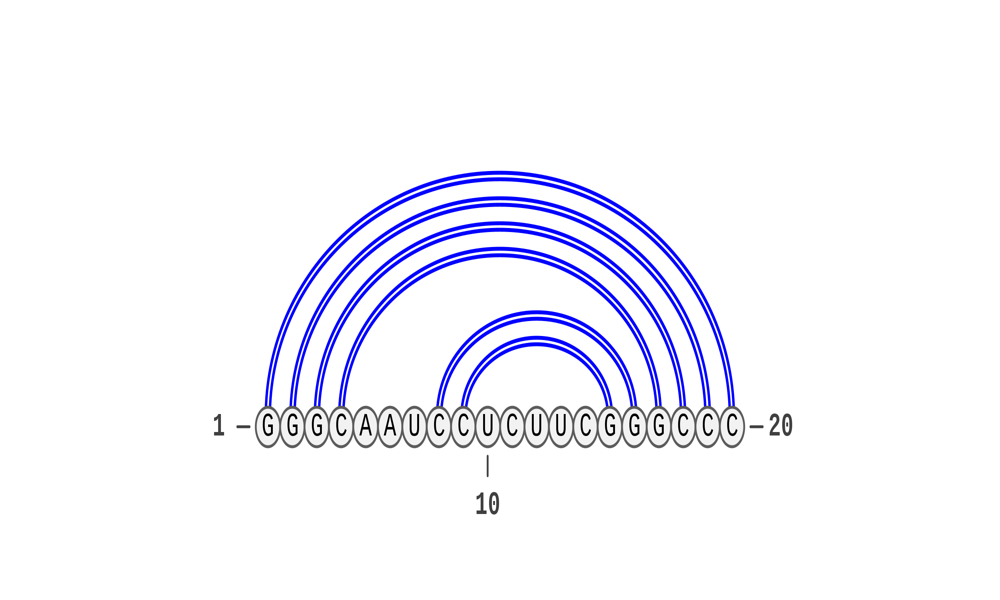

In [101]:
visualize_figure('rna_linear_plot.png')